In [1]:
import numpy as np
from matplotlib import pyplot as plt

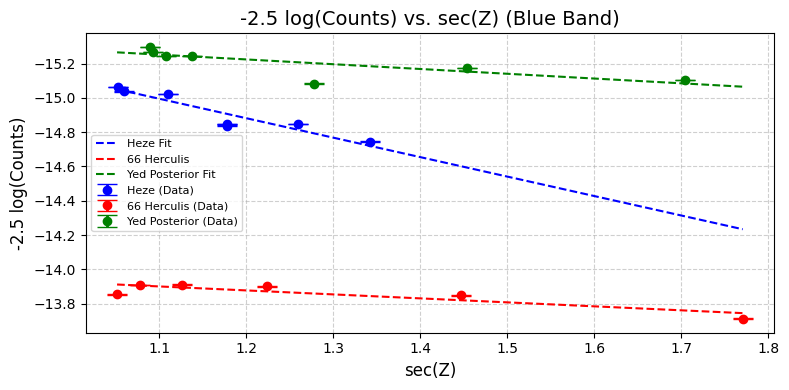

Atmospheric Extinction Correction in Blue band with Errors
Heze: a_blue = 1.1338 ± 0.0044
66 Herculis: a_blue = 0.2319 ± 0.0031
Yed Posterior: a_blue = 0.2783 ± 0.0018
resultant value= 0.5480 ± 0.0384


In [14]:
# Heze
mag_hezeb = np.array([-14.83806485, -15.06376485, -15.03696485, -15.02186485, -14.84746485, -14.84766485, -14.74436485])
secz_hezeb = np.array([1.1777, 1.0526, 1.0596, 1.1102, 1.1781, 1.2593, 1.3416])
counts_heze = 10**(-0.4 * mag_hezeb)
error_counts_heze = np.sqrt(counts_heze)
error_mag_heze = (2.5 / np.log(10)) * (error_counts_heze / counts_heze)

# 66 Herculis
mag_66b = np.array([-13.71256485, -13.84906485, -13.90236485, -13.91096485, -13.90926485, -13.85526485])
secz_66b = np.array([1.7705, 1.4462, 1.2241, 1.1264, 1.0778, 1.0513])
counts_66 = 10**(-0.4 * mag_66b)
error_counts_66 = np.sqrt(counts_66)
error_mag_66 = (2.5 / np.log(10)) * (error_counts_66 / counts_66)

# Yed Posterior
mag_yedb = np.array([-15.10426485, -15.17446485, -15.08336485, -15.24246485, -15.24216485, -15.26706485, -15.29556485])
secz_yedb = np.array([1.7038, 1.4531, 1.2781, 1.1380, 1.1078, 1.0921, 1.0891])
counts_yed = 10**(-0.4 * mag_yedb)
error_counts_yed = np.sqrt(counts_yed)
error_mag_yed = (2.5 / np.log(10)) * (error_counts_yed / counts_yed)

# Weighted Linear Fit
def weighted_fit(x, y, errors):
    weights = 1 / errors**2
    m, c = np.polyfit(x, y, 1, w=weights)
    return m, c

m_heze, c_heze = weighted_fit(secz_hezeb, mag_hezeb, error_mag_heze)
m_66, c_66 = weighted_fit(secz_66b, mag_66b, error_mag_66)
m_yed, c_yed = weighted_fit(secz_yedb, mag_yedb, error_mag_yed)

# Calculate error in slope
def slope_error(x, y, errors):
    weights = 1 / errors**2
    x_w = np.sum(weights * x) / np.sum(weights)
    D = np.sum(weights * (x - x_w)**2)
    return np.sqrt(1 / D)

error_m_heze = slope_error(secz_hezeb, mag_hezeb, error_mag_heze)
error_m_66 = slope_error(secz_66b, mag_66b, error_mag_66)
error_m_yed = slope_error(secz_yedb, mag_yedb, error_mag_yed)

# Generate fitted lines
fit_secz = np.linspace(min(secz_yedb.tolist() + secz_66b.tolist() + secz_hezeb.tolist()), 
                      max(secz_yedb.tolist() + secz_66b.tolist() + secz_hezeb.tolist()), 100)
fit_mag_heze = m_heze * fit_secz + c_heze
fit_mag_66 = m_66 * fit_secz + c_66
fit_mag_yed = m_yed * fit_secz + c_yed

# Plot
plt.figure(figsize=(8,4))
plt.errorbar(secz_hezeb, mag_hezeb, yerr=error_mag_heze, fmt='o', color='blue', 
             label="Heze (Data)", capsize=7, elinewidth=2, markeredgewidth=1)
plt.errorbar(secz_66b, mag_66b, yerr=error_mag_66, fmt='o', color='red', 
             label="66 Herculis (Data)", capsize=7, elinewidth=2, markeredgewidth=1)
plt.errorbar(secz_yedb, mag_yedb, yerr=error_mag_yed, fmt='o', color='green', 
             label="Yed Posterior (Data)", capsize=7, elinewidth=2, markeredgewidth=1)

plt.plot(fit_secz, fit_mag_heze, color='blue', linestyle='--', label="Heze Fit")
plt.plot(fit_secz, fit_mag_66, color='red', linestyle='--', label="66 Herculis")
plt.plot(fit_secz, fit_mag_yed, color='green', linestyle='--',label="Yed Posterior Fit")

plt.xlabel("sec(Z)", fontsize=12)
plt.ylabel("-2.5 log(Counts)", fontsize=12)
plt.title("-2.5 log(Counts) vs. sec(Z) (Blue Band)", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

m = (m_66+m_yed+m_heze)/3.0
error = np.sqrt((error_m_66**2 + error_m_yed**2+error_m_heze)/3.0)
# Print results
print("Atmospheric Extinction Correction in Blue band with Errors")
print(f"Heze: a_blue = {m_heze:.4f} ± {error_m_heze:.4f}")
print(f"66 Herculis: a_blue = {m_66:.4f} ± {error_m_66:.4f}")
print(f"Yed Posterior: a_blue = {m_yed:.4f} ± {error_m_yed:.4f}")
print(f"resultant value= {m:.4f} ± {error:.4f}") 

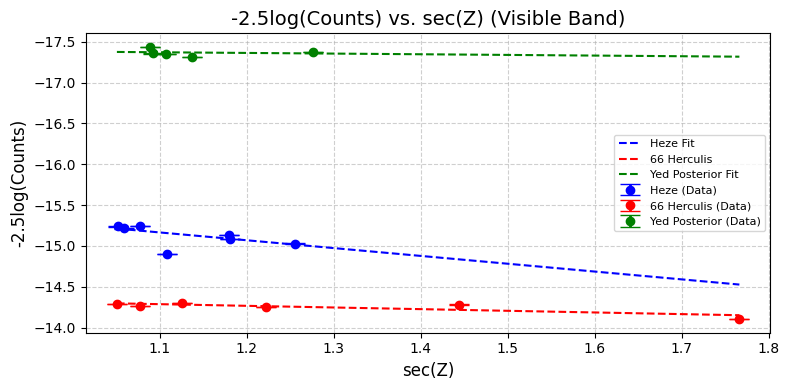

Atmospheric Extinction Correction in Visible band with Errors
Heze: a_visible = 0.9574 ± 0.0055
66 Herculis: a_visible = 0.2029 ± 0.0026
Yed Posterior: a_visible = 0.0809 ± 0.0023
resultant value= 0.4137 ± 0.0428


In [15]:
# Heze (Visible band)
mag_hezev = np.array([-15.13006485, -15.24376485, -15.23876485, -15.21386485,-14.90106485, -15.08886485, -15.02946485])
secz_hezev = np.array([1.1790, 1.0778, 1.0520, 1.0584, 1.1081, 1.1811, 1.2552])
counts_heze = 10**(-0.4 * mag_hezev)
error_counts_heze = np.sqrt(counts_heze)
error_mag_heze = (2.5 / np.log(10)) * (error_counts_heze / counts_heze)

# 66 Herculis (Visible band)
mag_66v = np.array([-14.10606485, -14.28226485, -14.24836485, -14.30116485, -14.26086485, -14.28946485])
secz_66v = np.array([1.7662, 1.4436, 1.2226, 1.1253, 1.0770, 1.0507])
counts_66 = 10**(-0.4 * mag_66v)
error_counts_66 = np.sqrt(counts_66)
error_mag_66 = (2.5 / np.log(10)) * (error_counts_66 / counts_66)

# Yed Posterior (Visible band)
mag_yedv = np.array([-17.3709,-17.3110,-17.3461,-17.3552,-17.4348])
secz_yedv = np.array([1.2764,1.1373,1.1073,1.0920,1.0892])
counts_yed = 10**(-0.4 * mag_yedv)
error_counts_yed = np.sqrt(counts_yed)
error_mag_yed = (2.5 / np.log(10)) * (error_counts_yed / counts_yed)

# Weighted Linear Fit
def weighted_fit(x, y, errors):
    weights = 1 / errors**2
    m, c = np.polyfit(x, y, 1, w=weights)
    return m, c

m_heze, c_heze = weighted_fit(secz_hezev, mag_hezev, error_mag_heze)
m_66, c_66 = weighted_fit(secz_66v, mag_66v, error_mag_66)
m_yed, c_yed = weighted_fit(secz_yedv, mag_yedv, error_mag_yed)

# Calculate error in slope
def slope_error(x, y, errors):
    weights = 1 / errors**2
    x_w = np.sum(weights * x) / np.sum(weights)
    D = np.sum(weights * (x - x_w)**2)
    return np.sqrt(1 / D)

error_m_heze = slope_error(secz_hezev, mag_hezev, error_mag_heze)
error_m_66 = slope_error(secz_66v, mag_66v, error_mag_66)
error_m_yed = slope_error(secz_yedv, mag_yedv, error_mag_yed)

# Generate fitted lines
fit_secz = np.linspace(min(secz_yedv.tolist() + secz_66v.tolist() + secz_hezev.tolist()), 
                      max(secz_yedv.tolist() + secz_66v.tolist() + secz_hezev.tolist()), 100)
fit_mag_heze = m_heze * fit_secz + c_heze
fit_mag_66 = m_66 * fit_secz + c_66
fit_mag_yed = m_yed * fit_secz + c_yed

m = (m_66+m_yed+m_heze)/3.0 # average atmospheric extinction coefficient (averaging slopes)
error = np.sqrt((error_m_66**2 + error_m_yed**2 + error_m_heze)/3.0) # (propagated uncertainity in atm. ext. coeff.)

# Plot
plt.figure(figsize=(8,4))
plt.errorbar(secz_hezev, mag_hezev, yerr=error_mag_heze, fmt='o', color='blue', 
             label="Heze (Data)", capsize=7, elinewidth=2, markeredgewidth=1)
plt.errorbar(secz_66v, mag_66v, yerr=error_mag_66, fmt='o', color='red', 
             label="66 Herculis (Data)", capsize=7, elinewidth=2, markeredgewidth=1)
plt.errorbar(secz_yedv, mag_yedv, yerr=error_mag_yed, fmt='o', color='green', 
             label="Yed Posterior (Data)", capsize=7, elinewidth=2, markeredgewidth=1)

plt.plot(fit_secz, fit_mag_heze, color='blue', linestyle='--', label="Heze Fit")
plt.plot(fit_secz, fit_mag_66, color='red', linestyle='--', label="66 Herculis")
plt.plot(fit_secz, fit_mag_yed, color='green', linestyle='--',label="Yed Posterior Fit")

plt.xlabel("sec(Z)", fontsize=12)
plt.ylabel("-2.5log(Counts)", fontsize=12)
plt.title("-2.5log(Counts) vs. sec(Z) (Visible Band)", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

# Print results
print("Atmospheric Extinction Correction in Visible band with Errors")
print(f"Heze: a_visible = {m_heze:.4f} ± {error_m_heze:.4f}")
print(f"66 Herculis: a_visible = {m_66:.4f} ± {error_m_66:.4f}")
print(f"Yed Posterior: a_visible = {m_yed:.4f} ± {error_m_yed:.4f}")
print(f"resultant value= {m:.4f} ± {error:.4f}")